# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

In [ ]:
Zuo Zuo

# Program Inititialization Section
## Enter your import packages here

In [4]:
# import packages 
import pandas as pd
import numpy as np
import datetime
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame




# Data File Reading Section
## Write code to read in data from external sources here

In [5]:
#read datasets
data = pd.read_csv('F:/lmu data/BSAN6070/CA01/data.csv',encoding = 'ISO-8859-1')
data.head()


F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [ ]:
# Your code for this section here ...
data.shape
data.isnull().sum()
data.info()
data.count()
data.mean()
data.std()
data.min()
data.max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [6]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here
data=data.drop(columns = ['stn_code', 'agency','sampling_date', 'location_monitoring_station'])
# dropping rows where no date is available

# ... your code here
data = data.dropna(subset=["date"])

In [7]:
# displaying final columns (data.columns)


# ... your code here
data.columns
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [8]:
# ... Your code here
data.type = data.type.replace({"Residential": "R", "Residential and others": "RO",
                               "Residential, Rural and other Areas": "RRO","Industrial Area": "I",
                               "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S",
                               "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO"})


In [9]:
# Display top 10 records after codification of 'types'
# ... Your code here
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [10]:
# ... Your code here
data.dtypes
data['date'] =pd.to_datetime(data['date'],format = '%Y-%m-%d') # dateFrame Date data, character converted to date format
data['year'] = data['date'].dt.year # gain the year from date data
data.head(5)


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [11]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')# determine the missing value and use what value to replace them
imputer = imp_mean.fit(data[["so2","no2","rspm","spm","pm2_5"]]) #determine the column need to fill the missing value
data[["so2","no2","rspm","spm","pm2_5"]] = imputer.transform(data[["so2","no2","rspm","spm","pm2_5"]]) #Substitute median value into the dataframe
data.head(15)
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

                   state        so2
0               Nagaland   2.000000
1                Mizoram   2.000000
2              Meghalaya   2.000000
3      Arunachal Pradesh   2.500000
4       Himachal Pradesh   3.000000
5                 Kerala   4.200000
6              Telangana   5.000000
7                 Odisha   5.000000
8        Jammu & Kashmir   5.000000
9         Andhra Pradesh   5.000000
10                   Goa   6.000000
11             Rajasthan   6.300000
12                 Delhi   6.300000
13                 Assam   6.500000
14            Puducherry   7.266667
15           Daman & Diu   7.600000
16            Chandigarh   7.950000
17           West Bengal   8.000000
18  Dadra & Nagar Haveli   8.400000
19             Karnataka  10.000000
20         Uttar Pradesh  10.000000
21            Tamil Nadu  10.000000
22                Punjab  10.300000
23               Manipur  10.829428
24                 Bihar  10.829428
25               Haryana  10.829428
26        Madhya Pradesh  10

<AxesSubplot:title={'center':'so2 status'}, xlabel='state'>

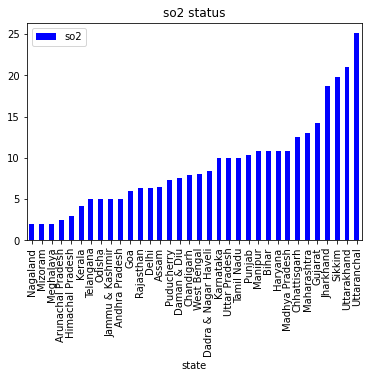

In [12]:
# ... Your code here
test1 = data[['state','so2']] # build a new dataframe only include state and so2 column
test1= test1.groupby("state").agg('median').sort_values('so2',ascending = True)
test1 = test1.reset_index()  #reset the index for new dataframe
print(test1)
test1.plot.bar(x="state",y="so2",color='blue',title="so2 status")



In [ ]:
#  Uttaranchal has the highest so2 content.  Nagaland has the lowest so2 content

### no2 status

                   state        no2
0      Arunachal Pradesh   5.000000
1                Mizoram   5.000000
2               Nagaland   7.000000
3              Meghalaya  10.000000
4                    Goa  11.600000
5             Puducherry  13.000000
6        Jammu & Kashmir  13.000000
7       Himachal Pradesh  13.900000
8                 Kerala  14.000000
9                  Assam  14.000000
10                Odisha  16.000000
11           Daman & Diu  17.600000
12            Chandigarh  18.000000
13  Dadra & Nagar Haveli  18.000000
14        Madhya Pradesh  19.200000
15               Manipur  19.800000
16        Andhra Pradesh  20.000000
17            Tamil Nadu  21.000000
18             Karnataka  21.200000
19          Chhattisgarh  21.500000
20             Telangana  22.000000
21               Haryana  22.750000
22               Gujarat  23.000000
23           Uttarakhand  25.809659
24             Rajasthan  26.000000
25                Sikkim  26.800000
26         Uttar Pradesh  27

<AxesSubplot:title={'center':'no2 status'}, xlabel='state'>

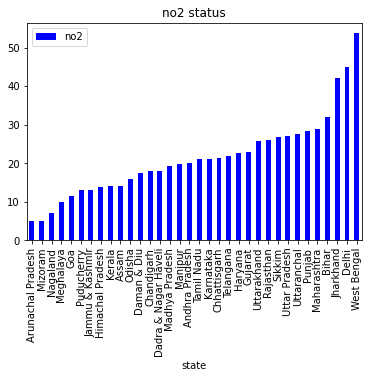

In [13]:
# ... Your code here
test2 = data[['state','no2']]# build a new dataframe only include state and no2 column
test2= test2.groupby("state").agg('median').sort_values('no2',ascending = True)
test2 = test2.reset_index() #reset the index for new dataframe
print(test2)
test2.plot.bar(x="state",y="no2",color='blue',title="no2 status")

In [ ]:
 # West Bengal has the highest no2 content.   Arunachal Pradesh has the lowest no2 content

### rspm status

                   state        rspm
0                 Sikkim   32.000000
1                Mizoram   40.000000
2             Puducherry   46.000000
3                 Kerala   49.000000
4                    Goa   56.000000
5              Meghalaya   57.000000
6             Tamil Nadu   59.000000
7                Manipur   61.000000
8              Karnataka   63.000000
9      Arunachal Pradesh   74.500000
10        Andhra Pradesh   76.000000
11                 Assam   77.000000
12              Nagaland   78.000000
13             Telangana   80.000000
14                Odisha   81.000000
15      Himachal Pradesh   90.000000
16            Chandigarh   90.000000
17  Dadra & Nagar Haveli   91.000000
18               Gujarat   95.000000
19           West Bengal   96.000000
20           Maharashtra   96.000000
21          Chhattisgarh  108.833091
22        Madhya Pradesh  108.833091
23                 Bihar  108.833091
24           Daman & Diu  108.833091
25           Uttaranchal  112.000000
2

<AxesSubplot:title={'center':'rspm status'}, xlabel='state'>

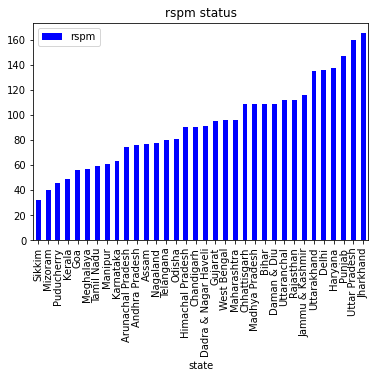

In [14]:
# ... Your code here
test3 = data[['state','rspm']] # build a new dataframe only include state and rspm column
test3= test3.groupby("state").agg('median').sort_values('rspm',ascending = True)
test3 = test3.reset_index() #reset the index for new dataframe
print(test3)
test3.plot.bar(x="state",y="rspm",color='blue',title="rspm status")

In [ ]:
 Jharkhand  has the highest content of rspm. Sikkim has the lowest content of rspm

### spm status

                   state        spm
0                 Sikkim   75.00000
1                Manipur  120.50000
2             Puducherry  191.00000
3                    Goa  199.00000
4            Daman & Diu  200.50000
5         Andhra Pradesh  220.78348
6              Meghalaya  220.78348
7                Mizoram  220.78348
8               Nagaland  220.78348
9                 Odisha  220.78348
10                Punjab  220.78348
11            Tamil Nadu  220.78348
12             Telangana  220.78348
13         Uttar Pradesh  220.78348
14           Uttarakhand  220.78348
15             Rajasthan  220.78348
16           Maharashtra  220.78348
17                Kerala  220.78348
18             Karnataka  220.78348
19             Jharkhand  220.78348
20       Jammu & Kashmir  220.78348
21      Himachal Pradesh  220.78348
22               Haryana  220.78348
23               Gujarat  220.78348
24  Dadra & Nagar Haveli  220.78348
25          Chhattisgarh  220.78348
26            Chandigarh  22

<AxesSubplot:title={'center':'spm status'}, xlabel='state'>

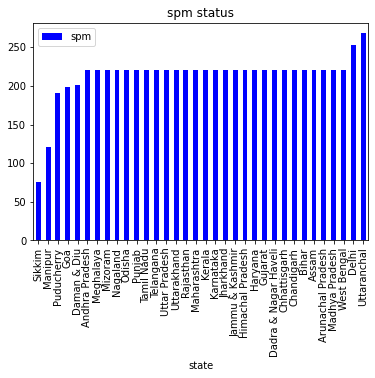

In [15]:
# ... Your code here
test4 = data[['state','spm']] # build a new dataframe only include state and spm column
test4= test4.groupby("state").agg('median').sort_values('spm',ascending = True)
test4 = test4.reset_index() #reset the index for new dataframe
print(test4)
test4.plot.bar(x="state",y="spm",color='blue',title="spm status")

In [ ]:
Uttaranchal has the highest content of spm. Sikkim has the lowest content of spm.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [16]:
# ... Your code here
test5 = data[['state','no2','so2','rspm','spm',"year"]] #create a new dataframe include required column
test5 = test5[test5.state == 'Andhra Pradesh']
test5
test5_group= test5.groupby("year").agg('median').sort_values('year',ascending = True)
test5_group.head(5)


,no2,so2,rspm,spm
year,,,,
1990,13.6,5.60,108.833091,179.00000
1991,12.8,8.25,108.833091,141.50000
1992,27.6,12.40,108.833091,192.00000
1993,11.4,6.00,108.833091,220.78348
1994,14.2,8.70,108.833091,220.78348


<function matplotlib.pyplot.show(close=None, block=None)>

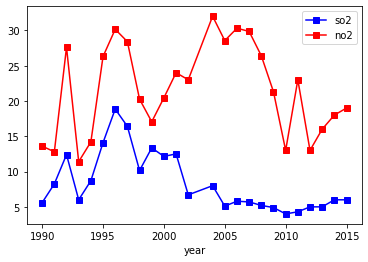

In [28]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
test5_group = test5_group.reset_index() #reset the index for new dataframe
test5_plot1 = test5_group[['year','no2','so2']]
test5_plot1

test5_plot1.plot(x='year', y=["so2","no2"],
                color = ('blue','red'),
                marker='s')
plt.show






<function matplotlib.pyplot.show(close=None, block=None)>

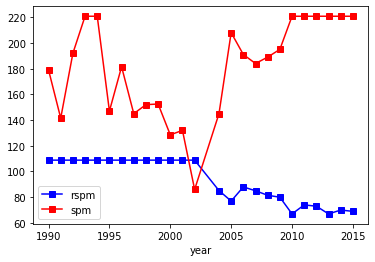

In [29]:
test5_plot2 = test5_group[['year','rspm','spm']]
test5_plot2
test5_plot2.plot(x='year', y=['rspm','spm'],
                color = ('blue','red'),
                marker='s')
plt.show


Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



In [ ]:
I found that so2 levels has been declining in recent years.No2 fluctuates greatly. RSPM also showed a downward trend. However, 
the spm content are on the rise.